In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [18]:
#nuskaitykite auto.csv failą į dataframe'ą.

auto = pd.read_csv('auto.csv', sep='|')[['gamintojas','rida','price','pagaminimo_data','modelis','variklis','kuro_tipas']]
auto['price'] = auto['price'].str.replace(' ','').apply(float)
auto['amzius'] = 2024 - auto['pagaminimo_data'].str[:4].apply(int)

# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.
# apvalinama į aukštesnę pusę:
#  1 km turi tapti 15 000 km
# 5600 km turi tapti 15 000 km
# 15 001 km turi tapti 30 000 km
# 25 800 km turi tapti 30 000 km
# 30 001 km turi tapti 45 000 km
# NOTE - čia geriau turėti naują DF, kur 

autoR = auto.query('rida != "Nenurodyta"')[['gamintojas','rida','price','amzius','kuro_tipas']]
autoR['rida'] = autoR['rida'].str.replace(' ','').str.replace('km','').apply(float)
autoR['R'] = np.ceil(autoR['rida']/15000.0)*15000.0

# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą. (groupby, reset_index, query)
vidK = auto['price'].mean()
BrA5 = auto.groupby('gamintojas').mean(numeric_only=True).reset_index().query('price > @vidK').sort_values(by='price',ascending=False).head()
BrA5[['gamintojas','amzius']]
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.


,gamintojas,amzius
1,Aston Martin,9.000000
37,Porsche,8.200000
46,Tesla,5.888889
24,Land Rover,6.750000
28,Maserati,7.000000


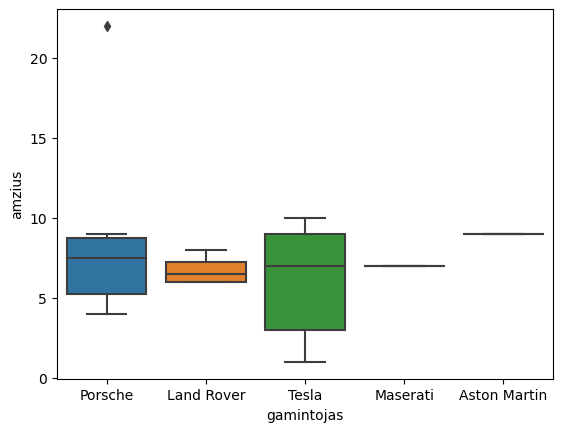

In [8]:
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.
A5 = BrA5['gamintojas'].values.tolist()
sns.boxplot(data=auto.query('gamintojas in @A5'), x='gamintojas',y='amzius')
plt.show()


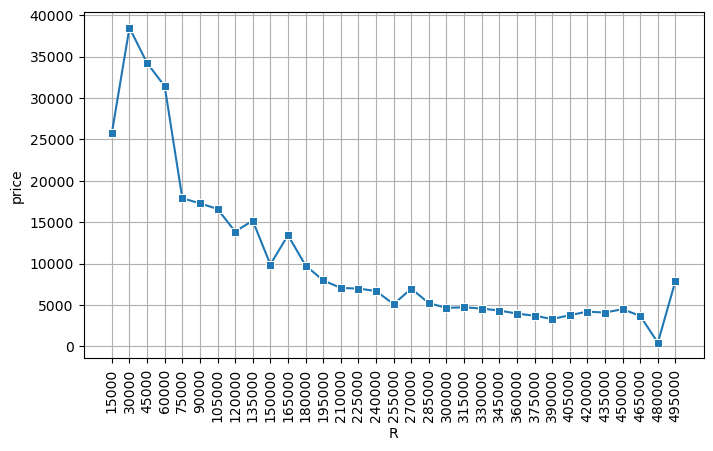

In [28]:

# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale
fig =plt.figure(figsize=[8,4.5])
ridos = autoR.query('R < 5e5').groupby('R').mean(numeric_only=True).reset_index()[['R','price']]
ax = sns.lineplot(data=ridos, x='R',y='price',marker='s')
ax.grid()
ax.set_xticks(ridos['R'].values)
ax.tick_params(axis='x', rotation=90)
plt.show()


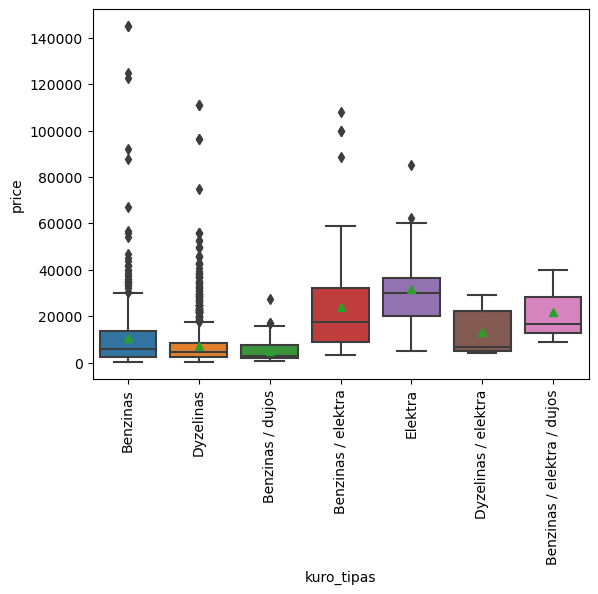

In [16]:

# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo
axc = sns.boxplot(data=auto,x='kuro_tipas',y='price',showmeans=True)
axc.tick_params(axis='x',rotation=90)
plt.show()


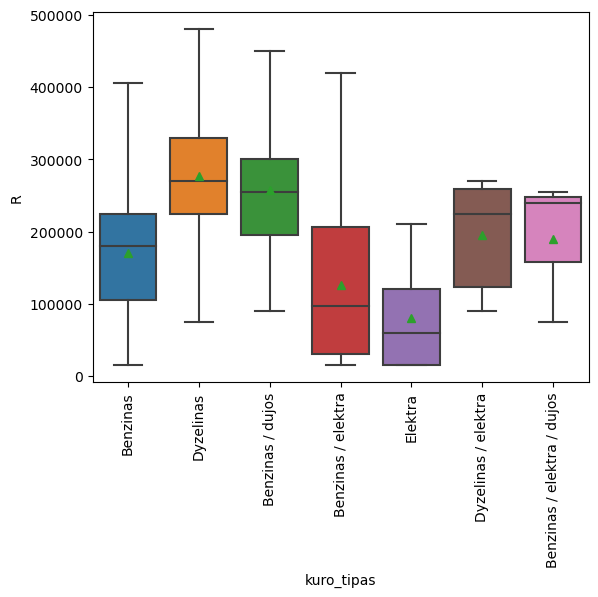

In [20]:


# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo

axc = sns.boxplot(data=autoR,x='kuro_tipas',y='R',showmeans=True, showfliers=False)
axc.tick_params(axis='x',rotation=90)
plt.show()



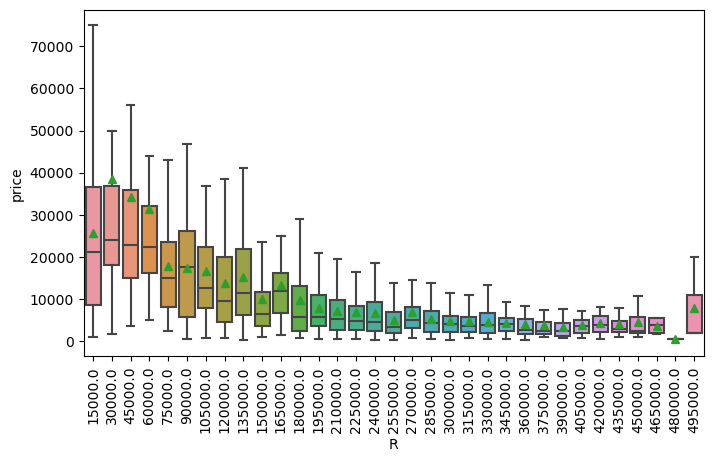

In [26]:

# atvaizduokite boxplotais kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
fig = plt.figure(figsize=[8,4.5])
ax = sns.boxplot(data=autoR.query('R <5e5'), x='R',y='price',showmeans=True,showfliers=False)
ax.tick_params(axis='x', rotation=90)
plt.show()

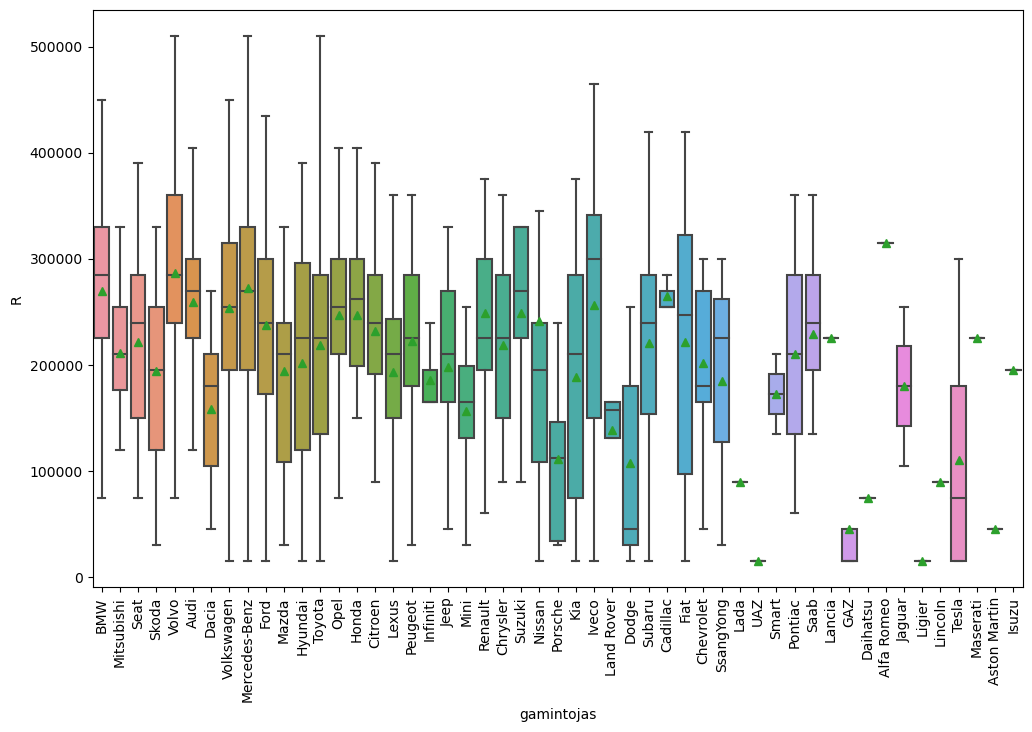

In [25]:

# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo
fig, ax = plt.subplots(figsize=[12,7.5])
ax = sns.boxplot(data=autoR, x='gamintojas', y='R',showmeans=True, showfliers=False)
ax.tick_params(axis='x',rotation=90)
plt.show()


In [ ]:


# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?

